03 주어진 데이터 세트는 경찰서별 월별 발생한 범죄 데이터이다. 2021년 대비 2022년의 연평균 범죄율이 가장 많이 늘어난 경찰서(Police Station)의 2021년 교통범죄(Traffic Crimes) 데이터를 구하시오.

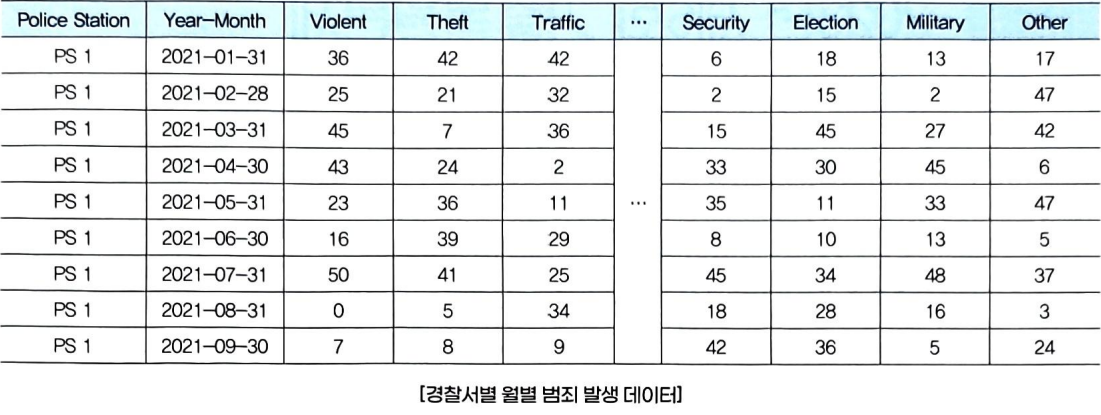

In [17]:
import pandas as pd

file = '/content/06.01.03-Crime Data.csv'
df = pd.read_csv(file)
# print(df.head())
# print(df.info())

df1 = df.copy()
# 주어진 데이터는 월별로 구성되어 있지만, 연도별 데이터를 구하는 문제이기 때문에
# 데이터를 연도별로 변환을 해야 한다. 이를 위해서 연(Year) 컬럼을 추가하자.
df1['Year-Month'] = pd.to_datetime(df1['Year-Month'])

df1['Year'] = df1['Year-Month'].dt.year     # dt연산자로 Year데이터만 추출
# df1['Year'] = df1['Year-Month'].dt.month    # dt연산자로 Month데이터만 추출

# print(df1.head())

# 문제를 풀기 위해서는 전체 범죄가 가장 많이 늘어난 경찰서를 찾아야 한다. 효율성을
# 높이기 위해 전체 범죄 데이터를 합산한 컬럼을 기존 데이터셋에 추가하고 데이터를 생성한다.

# 경찰서별, 월별 토탈 범죄 데이터 생성하기
df1.loc[:, 'Total'] = df.loc[:, 'Violent':'Other'].sum(axis=1)
# print(df1)

# 경찰서 별, 연도별, 토탈 범죄 데이터를 합산한 데이터셋을 생성
df2 = df1[['Police Station', 'Year', 'Traffic', 'Total']].groupby(by=['Police Station', 'Year']).sum([ 'Traffic', 'Total']).reset_index()
# print(df2)

# 위의 코드에서 생성한 데이터셋을 이용하여 21년 대비 22년 범죄가 가장 많이 늘어난 경찰서 찾기

# 두 개 행을 열로 붙이기
df21 = df2[df2['Year']==2021][['Police Station','Year','Total']]
df22 = df2[df2['Year']==2022][['Police Station','Year','Total']]
df3 = pd.merge(df21, df22, on='Police Station')
# print(df3)
# 가장 많이 늘어난 경찰서를 거져오기
df3['increase'] = df3['Total_y'] - df3['Total_x']
# print(df2)
most_increase_station = df3[df3['increase']==max(df3['increase'])]['Police Station'].item()
# print(most_increase_station)

# 범죄가 가장 많이 늘어난 PS2라는 값을 이용하여 해당 경찰서의 교통사고 건수를 가져와서 출력한다.
# 가장 많이 늘어난 경찰서의 2021년 교통범죄 데이터 가져오기
result = df2[(df2['Police Station'] == most_increase_station) & (df2['Year'] == 2021)]['Traffic'].item()
print(result)


   Police Station  Year  Traffic  Total
0            PS 1  2021      319   4340
1            PS 1  2022      271   3927
2           PS 10  2021      297   4421
3           PS 10  2022      252   3873
4           PS 11  2021      353   4187
5           PS 11  2022      270   3956
6           PS 12  2021      382   4027
7           PS 12  2022      295   4159
8           PS 13  2021      326   4024
9           PS 13  2022      346   4242
10          PS 14  2021      327   4650
11          PS 14  2022      388   4255
12          PS 15  2021      305   4056
13          PS 15  2022      282   4421
14          PS 16  2021      344   4181
15          PS 16  2022      340   4181
16          PS 17  2021      216   4368
17          PS 17  2022      259   4280
18          PS 18  2021      282   4412
19          PS 18  2022      342   4575
20          PS 19  2021      361   4269
21          PS 19  2022      371   4087
22           PS 2  2021      306   3802
23           PS 2  2022      323   4182
